In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from dlfs.layers import Conv2D

In [2]:
img = Image.open('images/car.jpg')
loaded_img = np.array(img) / 255.0

In [12]:
eye = np.array([[0, 0, 0],
                [0, 1, 0],
                [0, 0, 0]])

# ed stands for edge detection
ed1 = np.array([[1, 0, -1],
                [0, 0, 0],
                [-1, 0, 1]])

ed2 = np.array([[-1, -1, -1],
                [-1, 8, -1],
                [-1, -1, -1]])

ed3 = np.array([[0, -1, 0],
                [-1, 4, -1],
                [0, -1, 0]])

sharpen = np.array([[-1, 0, -1],
                    [0, 5, 0],
                    [-1, 0, -1]])

gaussian_blur_5x5 = np.array([[1, 4, 6, 4, 1],
                              [4, 16, 24, 16, 4],
                              [6, 24, 36, 24, 6],
                              [4, 16, 24, 16, 4],
                              [1, 4, 6, 4, 1]]) / 256

unsharp_mask5x5 = - np.array([[1, 4, 6, 4, 1],
                            [4, 16, 24, 16, 4],
                            [6, 24, -476, 24, 6],
                            [4, 16, 24, 16, 4],
                            [1, 4, 6, 4, 1]]) / 256

In [4]:
# Note: this was how it was done in previous versions of the code
def convolve(rgb_img, kernel, save_img=False, path=""):
    b = Conv2D.simple_convolution(rgb_img[..., 0], kernel)
    g = Conv2D.simple_convolution(rgb_img[..., 1], kernel)
    r = Conv2D.simple_convolution(rgb_img[..., 2], kernel)
    reconstructed_img = np.stack([b, g, r], axis=2)
    # normalize
    reconstructed_img = (reconstructed_img - reconstructed_img.min()) / (reconstructed_img.max() - reconstructed_img.min())
    if save_img:
        Image.fromarray((reconstructed_img * 255).astype(np.uint8)).save(path)

    plt.imshow(reconstructed_img)
    plt.axis('off')
    plt.show()



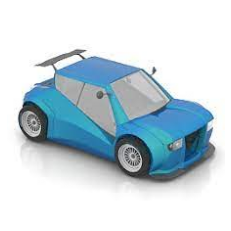

In [5]:
convolve(loaded_img, eye, True, "images/eye.png")

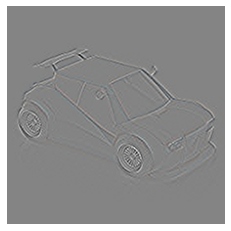

In [6]:
convolve(loaded_img, ed1, True, "images/edge_detection1.png")

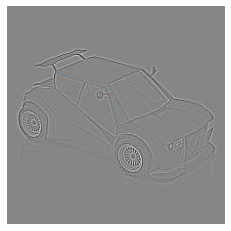

In [7]:
convolve(loaded_img, ed2, True, "images/edge_detection2.png")

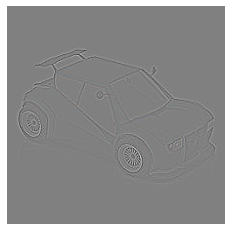

In [8]:
convolve(loaded_img, ed3, True, "images/edge_detection3.png")

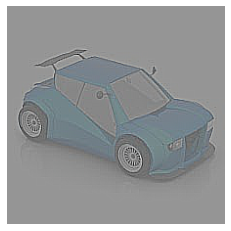

In [14]:
convolve(loaded_img, sharpen, True, "images/sharpen.png")

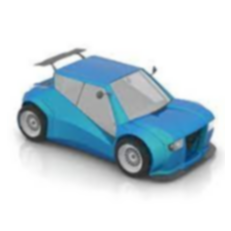

In [10]:
convolve(loaded_img, gaussian_blur_5x5, True, "images/gaussian_blur_5x5.png")

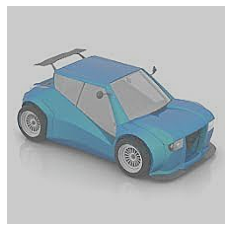

In [11]:
convolve(loaded_img, unsharp_mask5x5, True, "images/unsharp_mask5x5.png")